In [3]:
#!pip install pytrends
import pandas as pd                        
from pytrends.request import TrendReq

#### Connecting to Google API

In [4]:
pytrend = TrendReq(timeout=(10,25), retries=3, backoff_factor=0.3)

#### Testing with one search query

In [8]:
pytrend.build_payload(kw_list=['Ethereum'])
# Interest by Region
df = pytrend.interest_by_region()
df.head(10)

,Ethereum
geoName,
Afghanistan,0
Albania,47
Algeria,8
American Samoa,0
Andorra,0
Angola,0
Anguilla,0
Antarctica,0
Antigua & Barbuda,0


In [13]:
df_relevant = df.reset_index()
df_relevant = df_relevant[df_relevant['Ethereum'] > 0]

In [14]:
df_relevant

,geoName,Ethereum
1,Albania,47
2,Algeria,8
9,Argentina,44
12,Australia,67
13,Austria,92
16,Bahrain,46
17,Bangladesh,12
19,Belarus,8
20,Belgium,62
26,Bosnia & Herzegovina,32


<AxesSubplot:xlabel='geoName'>

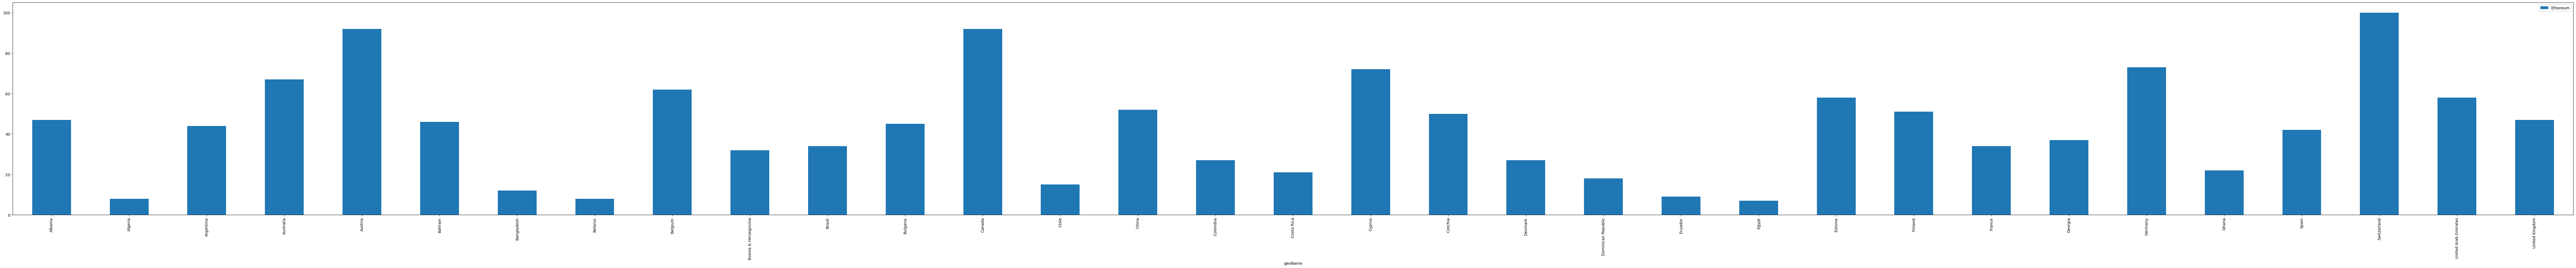

In [15]:
df_relevant.plot(x='geoName', y='Ethereum', figsize=(120, 10), kind ='bar')

In [7]:
# Get Google Hot Trends data
df = pytrend.trending_searches(pn='united_states')
df.head()

,0
0,Drake Bell
1,Fort Lauderdale
2,Nima Momeni
3,Europa League
4,Jack Teixeira


In [32]:
#provide your search terms
kw_list=['Facebook', 'Apple', 'Amazon', 'Netflix', 'Google']

#search interest per region
#run model for keywords (can also be competitors)
pytrend.build_payload(kw_list, timeframe='today 1-m')

# Interest by Region
regiondf = pytrend.interest_by_region()

In [33]:
regiondf = regiondf.reset_index()
regiondf

,geoName,Facebook,Apple,Amazon,Netflix,Google
0,Afghanistan,0,0,0,0,0
1,Albania,0,0,0,0,0
2,Algeria,0,0,0,0,0
3,American Samoa,0,0,0,0,0
4,Andorra,0,0,0,0,0
...,...,...,...,...,...,...
245,Western Sahara,0,0,0,0,0
246,Yemen,0,0,0,0,0
247,Zambia,0,0,0,0,0
248,Zimbabwe,0,0,0,0,0


In [34]:
#looking at rows where all values are not equal to 0
regiondf= regiondf[(regiondf['Facebook'] != 0) | (regiondf['Apple'] != 0) | (regiondf['Amazon'] != 0) | (regiondf['Google'] != 0)]

#drop all rows that have null values in all columns
#regiondf.dropna(how='all',axis=0, inplace=True)

In [36]:
#regiondf

<AxesSubplot:>

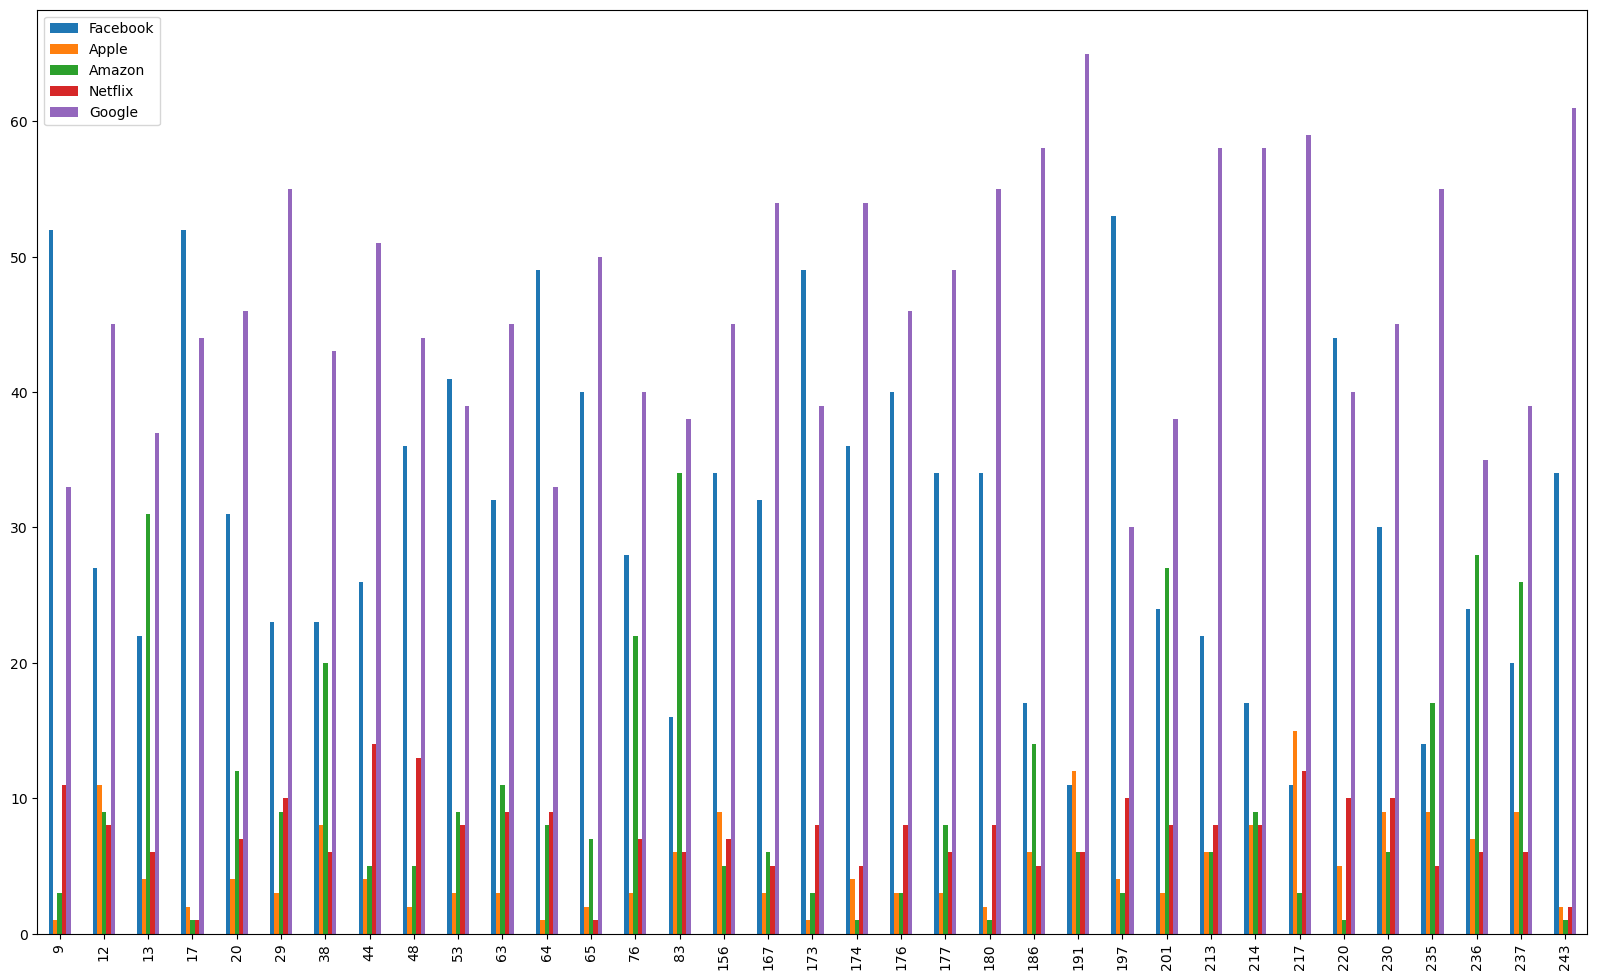

In [37]:
#visualise
regiondf.plot(figsize=(20, 12), y=kw_list, kind ='bar')

#### Interest over time

In [42]:
pytrend.build_payload(kw_list=['Ethereum'])
df = pytrend.interest_over_time()
df

,Ethereum,isPartial
date,,
2018-04-15,7,False
2018-04-22,8,False
2018-04-29,9,False
2018-05-06,8,False
2018-05-13,7,False
...,...,...
2023-03-12,14,False
2023-03-19,15,False
2023-03-26,13,False


In [44]:
df_eth = df.reset_index()

In [45]:
df_eth

,date,Ethereum,isPartial
0,2018-04-15,7,False
1,2018-04-22,8,False
2,2018-04-29,9,False
3,2018-05-06,8,False
4,2018-05-13,7,False
...,...,...,...
256,2023-03-12,14,False
257,2023-03-19,15,False
258,2023-03-26,13,False
259,2023-04-02,13,False


In [49]:
df_eth_cut = df_eth[['date', 'Ethereum']].copy()

In [50]:
df_eth_cut

,date,Ethereum
0,2018-04-15,7
1,2018-04-22,8
2,2018-04-29,9
3,2018-05-06,8
4,2018-05-13,7
...,...,...
256,2023-03-12,14
257,2023-03-19,15
258,2023-03-26,13
259,2023-04-02,13


In [51]:
df_eth_cut_T = df_eth_cut.T

In [52]:
df_eth_cut_T

,0,1,2,3,4,5,6,7,8,9,...,251,252,253,254,255,256,257,258,259,260
date,2018-04-15 00:00:00,2018-04-22 00:00:00,2018-04-29 00:00:00,2018-05-06 00:00:00,2018-05-13 00:00:00,2018-05-20 00:00:00,2018-05-27 00:00:00,2018-06-03 00:00:00,2018-06-10 00:00:00,2018-06-17 00:00:00,...,2023-02-05 00:00:00,2023-02-12 00:00:00,2023-02-19 00:00:00,2023-02-26 00:00:00,2023-03-05 00:00:00,2023-03-12 00:00:00,2023-03-19 00:00:00,2023-03-26 00:00:00,2023-04-02 00:00:00,2023-04-09 00:00:00
Ethereum,7,8,9,8,7,6,6,5,6,5,...,12,13,12,11,11,14,15,13,13,13


In [53]:
df_eth_cut_T.columns = df_eth_cut_T.iloc[0]
df_eth_cut_T.drop(df_eth_cut_T.index[0])
df_eth_cut_T

date,2018-04-15,2018-04-22,2018-04-29,2018-05-06,2018-05-13,2018-05-20,2018-05-27,2018-06-03,2018-06-10,2018-06-17,...,2023-02-05,2023-02-12,2023-02-19,2023-02-26,2023-03-05,2023-03-12,2023-03-19,2023-03-26,2023-04-02,2023-04-09
date,2018-04-15 00:00:00,2018-04-22 00:00:00,2018-04-29 00:00:00,2018-05-06 00:00:00,2018-05-13 00:00:00,2018-05-20 00:00:00,2018-05-27 00:00:00,2018-06-03 00:00:00,2018-06-10 00:00:00,2018-06-17 00:00:00,...,2023-02-05 00:00:00,2023-02-12 00:00:00,2023-02-19 00:00:00,2023-02-26 00:00:00,2023-03-05 00:00:00,2023-03-12 00:00:00,2023-03-19 00:00:00,2023-03-26 00:00:00,2023-04-02 00:00:00,2023-04-09 00:00:00
Ethereum,7,8,9,8,7,6,6,5,6,5,...,12,13,12,11,11,14,15,13,13,13


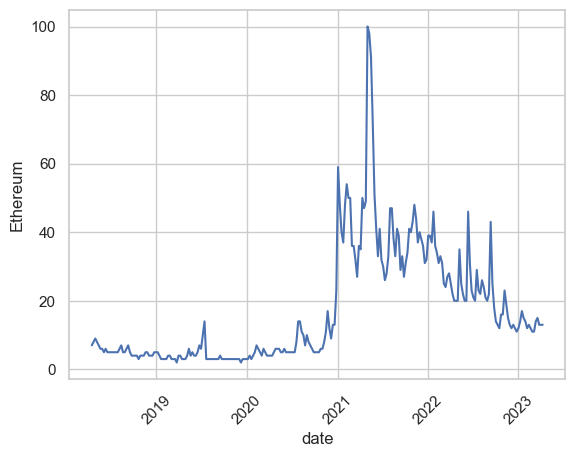

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
fig=sns.lineplot(x=df_eth['date'],y=df_eth['Ethereum'])
fig=plt.xticks(rotation=45)

In [59]:
kw_list=['Ethereum']
pytrend.build_payload(kw_list, timeframe='2023-01-01 2023-01-31')
multirange_df = pytrend.interest_over_time()

In [60]:
multirange_df

,Ethereum,isPartial
date,,
2023-01-01,52,False
2023-01-02,58,False
2023-01-03,60,False
2023-01-04,74,False
2023-01-05,61,False
2023-01-06,58,False
2023-01-07,49,False
2023-01-08,47,False
2023-01-09,65,False


In [61]:
kw_list=['Ethereum']
pytrend.build_payload(kw_list, timeframe='2023-01-01 2023-01-02')
hourly_df = pytrend.interest_over_time()

In [62]:
hourly_df

,Ethereum,isPartial
date,,
2023-01-01,90,False
2023-01-02,100,False


In [63]:
kw_list=['Ethereum']
pytrend.build_payload(kw_list, timeframe='2023-01-01 2023-01-01')
hourly_df = pytrend.interest_over_time()

In [64]:
hourly_df

,Ethereum,isPartial
date,,
2023-01-01,100,False


In [69]:
pytrend.build_payload(kw_list=['Ethereum', 'Bitcoin'])
multi_queries = pytrend.interest_over_time()
multi_queries

,Ethereum,Bitcoin,isPartial
date,,,
2018-04-15,2,19,False
2018-04-22,2,18,False
2018-04-29,2,16,False
2018-05-06,2,16,False
2018-05-13,2,14,False
...,...,...,...
2023-03-12,4,27,False
2023-03-19,4,28,False
2023-03-26,3,24,False


In [71]:
pytrend.build_payload(kw_list=['Bitcoin'])
bitcoin = pytrend.interest_over_time()
bitcoin

,Bitcoin,isPartial
date,,
2018-04-15,19,False
2018-04-22,18,False
2018-04-29,16,False
2018-05-06,16,False
2018-05-13,14,False
...,...,...
2023-03-12,27,False
2023-03-19,28,False
2023-03-26,24,False


In [72]:
pytrend.build_payload(kw_list=['Ethereum'])
ethereum = pytrend.interest_over_time()
ethereum

,Ethereum,isPartial
date,,
2018-04-15,7,False
2018-04-22,8,False
2018-04-29,9,False
2018-05-06,9,False
2018-05-13,6,False
...,...,...
2023-03-12,15,False
2023-03-19,15,False
2023-03-26,13,False


In [82]:
pytrend.build_payload(kw_list=['Bitcoin', 'Crypto', 'blockchain'])
multi_queries = pytrend.interest_over_time()
multi_queries

,Bitcoin,Crypto,blockchain,isPartial
date,,,,
2018-04-15,19,3,0,False
2018-04-22,18,3,0,False
2018-04-29,16,3,0,False
2018-05-06,16,3,0,False
2018-05-13,14,3,0,False
...,...,...,...,...
2023-03-12,27,0,2,False
2023-03-19,28,8,0,False
2023-03-26,24,7,2,False


In [79]:
pytrend.build_payload(kw_list=['blockchain'])
blockchain = pytrend.interest_over_time()
blockchain

,blockchain,isPartial
date,,
2018-04-15,0,False
2018-04-22,0,False
2018-04-29,0,False
2018-05-06,0,False
2018-05-13,0,False
...,...,...
2023-03-12,40,False
2023-03-19,0,False
2023-03-26,39,False


In [5]:
queries = pd.read_csv('trends.csv')

In [6]:
queries

,location,year,category,rank,query
0,Global,2001,Consumer Brands,1,Nokia
1,Global,2001,Consumer Brands,2,Sony
2,Global,2001,Consumer Brands,3,BMW
3,Global,2001,Consumer Brands,4,Palm
4,Global,2001,Consumer Brands,5,Adobe
...,...,...,...,...,...
26950,Vietnam,2020,Là Gì?,1,Virus Corona là gì
26951,Vietnam,2020,Là Gì?,2,Miễn thị thực là gì
26952,Vietnam,2020,Là Gì?,3,Đầu cắt moi là gì
26953,Vietnam,2020,Là Gì?,4,Bệnh bạch hầu là gì


In [7]:
queries_global = queries[queries['location'] == 'Global']

In [8]:
#queries_global

In [9]:
queries_global = queries_global[['query']].copy()

In [10]:
queries_global

,query
0,Nokia
1,Sony
2,BMW
3,Palm
4,Adobe
...,...
24030,Tiger King
24031,Big Brother Brasil
24032,Money Heist
24033,Cobra Kai


In [11]:
queries_global_corr = queries_global.drop_duplicates().reset_index(drop=True)

In [12]:
queries_global_corr

,query
0,Nokia
1,Sony
2,BMW
3,Palm
4,Adobe
...,...
914,Sourdough bread
915,Lahmacun
916,Tiger King
917,Money Heist


In [13]:
query_list = list(queries_global_corr['query'])

In [14]:
query_list

['Nokia',
 'Sony',
 'BMW',
 'Palm',
 'Adobe',
 'Nostradamus',
 'Osama bin Laden',
 'Eminem',
 'Michael Jackson',
 'Howard Stern',
 'Harry Potter',
 'Lord of the Rings',
 'Final Fantasy',
 'Tomb Raider',
 'Shrek',
 'Morpheus',
 'Napster',
 'Gnutella',
 'Kazaa',
 'Audiogalaxy',
 'Beatles',
 'U2',
 'N Sync',
 'Backstreet Boys',
 'Linkin Park',
 'Windows XP',
 'Xbox',
 'PlayStation 2',
 'GameCube',
 'Nokia 5510',
 'CNN',
 'BBC',
 'New York Times',
 'MSNBC',
 'Washington Post',
 'Amazon',
 'IKEA',
 'Toys "R" Us',
 'Walmart',
 'Circuit City',
 'Anna Kournikova',
 'Tour de France',
 'Dale Earnhardt',
 'Wimbledon',
 'US Open',
 'Loft Story',
 'Big Brother',
 'The Simpsons',
 'Survivor',
 'Gran Hermano',
 'Counterstrike',
 'The Sims',
 'Operation Flashpoint',
 'Moorhuhn 3',
 'Wolfenstein',
 'Britney Spears',
 'Pamela Anderson',
 'Jennifer Lopez',
 'Madonna',
 'Aaliyah',
 'David Beckham',
 'Ronaldo',
 'Kobe Bryant',
 'Zinedine Zidane',
 'Ferrari',
 'Disney',
 'Pokémon',
 'Snoopy',
 'Superman',
 

In [127]:
from random import randint
from time import sleep
def getData(list_of_queries):
    data_df = pd.DataFrame()
    for query in list_of_queries:
        kw_list = [query]
        pytrend.build_payload(kw_list, timeframe='today 12-m')
        df = pytrend.interest_over_time()
        df = df.reset_index()
        df_cut = df[['date', query]].copy()
        data_df = pd.concat([data_df, df_cut], axis=1)
        sleep(randint(5,15)) #respectful nap
    #Remove duplicate date columns
    data_df = data_df.loc[:,~data_df.columns.duplicated()]
    return data_df

In [128]:
query_dataset = getData(query_list[:3])

In [132]:
query_dataset_1_till_3 = query_dataset

In [155]:
#query_dataset_1_till_3

In [154]:
#query_list[3:]

In [136]:
rest_dataset_4_till_50 = getData(query_list[3:50])

In [138]:
#rest_dataset_4_till_50

In [140]:
rest_dataset_50_till_100 = getData(query_list[50:100])

In [143]:
#rest_dataset_50_till_100

In [142]:
sum_queries = pd.concat([query_dataset_1_till_3, rest_dataset_4_till_50, rest_dataset_50_till_100], axis=1)

In [145]:
#sum_queries

In [147]:
rest_dataset_100_till_150 = getData(query_list[100:150])

In [150]:
#rest_dataset_100_till_150

In [149]:
sum_queries = pd.concat([sum_queries, rest_dataset_100_till_150], axis=1)

In [153]:
#sum_queries

In [152]:
sum_queries.to_csv('dataset.csv', index=False)

In [158]:
rest_dataset_150_till_200 = getData(query_list[150:200])

In [160]:
#rest_dataset_150_till_200

In [161]:
sum_queries = pd.concat([sum_queries, rest_dataset_150_till_200], axis=1)

In [162]:
sum_queries.to_csv('dataset.csv', index=False)

In [163]:
rest_dataset_200_till_250 = getData(query_list[200:250])

In [165]:
#rest_dataset_200_till_250

In [166]:
sum_queries = pd.concat([sum_queries, rest_dataset_200_till_250], axis=1)

In [168]:
#sum_queries

In [169]:
sum_queries.to_csv('dataset.csv', index=False)

In [171]:
rest_dataset_250_till_300 = getData(query_list[250:300])

In [173]:
#rest_dataset_250_till_300

In [174]:
sum_queries = pd.concat([sum_queries, rest_dataset_250_till_300], axis=1)
sum_queries.to_csv('dataset.csv', index=False)

In [175]:
rest_dataset_300_till_350 = getData(query_list[300:350])

In [177]:
#rest_dataset_300_till_350

In [178]:
sum_queries = pd.concat([sum_queries, rest_dataset_300_till_350], axis=1)
sum_queries.to_csv('dataset.csv', index=False)

In [16]:
from random import randint
from time import sleep
def getData1(list_of_queries):
    data_df = pd.DataFrame()
    count = 0
    for query in list_of_queries:
        count += 1
        kw_list = [query]
        pytrend.build_payload(kw_list, timeframe='all')
        df = pytrend.interest_over_time()
        df = df.reset_index()
        df_cut = df[['date', query]].copy()
        data_df = pd.concat([data_df, df_cut], axis=1)
        #Remove duplicate date columns
        data_df = data_df.loc[:,~data_df.columns.duplicated()]
        title = 'dataset_all'+str(count)+'.csv'
        data_df.to_csv(title, index=False)
        sleep(randint(10,20)) #respectful nap
    return data_df

In [17]:
all_data = getData1(query_list[:3])

In [19]:
all_data = getData1(query_list)

KeyError: "None of [Index(['date', 'Dale Earnhardt'], dtype='object')] are in the [columns]"

In [24]:
from random import randint
from time import sleep
def getData1(list_of_queries):
    data_df = pd.DataFrame()
    count = 42
    for query in list_of_queries:
        count += 1
        kw_list = [query]
        pytrend.build_payload(kw_list, timeframe='all')
        df = pytrend.interest_over_time()
        df = df.reset_index()
        df_cut = df[['date', query]].copy()
        data_df = pd.concat([data_df, df_cut], axis=1)
        #Remove duplicate date columns
        data_df = data_df.loc[:,~data_df.columns.duplicated()]
        title = 'dataset_all'+str(count)+'.csv'
        data_df.to_csv(title, index=False)
        sleep(randint(30,60)) #respectful nap
    return data_df

In [22]:
query_list[42:]

['Dale Earnhardt', 'Wimbledon', 'US Open']

In [ ]:
#ab 43 neues DataFrame

In [27]:
getData1(query_list[43:])

KeyError: "None of [Index(['date', 'Puma'], dtype='object')] are in the [columns]"

In [29]:
query_list[178]

'Puma'

In [30]:
from random import randint
from time import sleep
def getData1(list_of_queries):
    data_df = pd.DataFrame()
    count = 177
    for query in list_of_queries:
        count += 1
        kw_list = [query]
        pytrend.build_payload(kw_list, timeframe='all')
        df = pytrend.interest_over_time()
        df = df.reset_index()
        df_cut = df[['date', query]].copy()
        data_df = pd.concat([data_df, df_cut], axis=1)
        #Remove duplicate date columns
        data_df = data_df.loc[:,~data_df.columns.duplicated()]
        title = 'dataset_all'+str(count)+'.csv'
        data_df.to_csv(title, index=False)
        sleep(randint(30,60)) #respectful nap
    return data_df

In [32]:
#query_list[178:]

In [ ]:
#ab 178 neues DataFrame

In [33]:
getData1(query_list[178:])

KeyError: "None of [Index(['date', 'Dentist'], dtype='object')] are in the [columns]"

In [35]:
query_list[185]

'Dentist'

In [36]:
from random import randint
from time import sleep
def getData1(list_of_queries):
    data_df = pd.DataFrame()
    count = 184
    for query in list_of_queries:
        count += 1
        kw_list = [query]
        pytrend.build_payload(kw_list, timeframe='all')
        df = pytrend.interest_over_time()
        df = df.reset_index()
        df_cut = df[['date', query]].copy()
        data_df = pd.concat([data_df, df_cut], axis=1)
        #Remove duplicate date columns
        data_df = data_df.loc[:,~data_df.columns.duplicated()]
        title = 'dataset_all'+str(count)+'.csv'
        data_df.to_csv(title, index=False)
        sleep(randint(60,120)) #respectful nap
    return data_df

In [39]:
getData1(query_list[184:])

KeyError: "None of [Index(['date', 'John Kerry'], dtype='object')] are in the [columns]"

In [ ]:
#new dataFrame ab 185

In [40]:
query_list[202]

'John Kerry'

In [41]:
from random import randint
from time import sleep
def getData1(list_of_queries):
    data_df = pd.DataFrame()
    count = 202
    for query in list_of_queries:
        count += 1
        kw_list = [query]
        pytrend.build_payload(kw_list, timeframe='all')
        df = pytrend.interest_over_time()
        df = df.reset_index()
        df_cut = df[['date', query]].copy()
        data_df = pd.concat([data_df, df_cut], axis=1)
        #Remove duplicate date columns
        data_df = data_df.loc[:,~data_df.columns.duplicated()]
        title = 'dataset_all'+str(count)+'.csv'
        data_df.to_csv(title, index=False)
        sleep(randint(60,120)) #respectful nap
    return data_df

In [42]:
getData1(query_list[202:])

KeyError: "None of [Index(['date', 'Where is Matt'], dtype='object')] are in the [columns]"

In [ ]:
# new Data Frame ab 203

In [43]:
from random import randint
from time import sleep
def getData1(list_of_queries):
    data_df = pd.DataFrame()
    count = 271
    for query in list_of_queries:
        count += 1
        kw_list = [query]
        pytrend.build_payload(kw_list, timeframe='all')
        df = pytrend.interest_over_time()
        df = df.reset_index()
        df_cut = df[['date', query]].copy()
        data_df = pd.concat([data_df, df_cut], axis=1)
        #Remove duplicate date columns
        data_df = data_df.loc[:,~data_df.columns.duplicated()]
        title = 'dataset_all'+str(count)+'.csv'
        data_df.to_csv(title, index=False)
        sleep(randint(60,120)) #respectful nap
    return data_df

In [44]:
query_list[271]

'Where is Matt'

In [45]:
getData1(query_list[271:])

KeyError: "None of [Index(['date', 'International Society Of Transport Aircraft Trading'], dtype='object')] are in the [columns]"

In [46]:
query_list[401]

'International Society Of Transport Aircraft Trading'

In [47]:
from random import randint
from time import sleep
def getData1(list_of_queries):
    data_df = pd.DataFrame()
    count = 401
    for query in list_of_queries:
        count += 1
        kw_list = [query]
        pytrend.build_payload(kw_list, timeframe='all')
        df = pytrend.interest_over_time()
        df = df.reset_index()
        df_cut = df[['date', query]].copy()
        data_df = pd.concat([data_df, df_cut], axis=1)
        #Remove duplicate date columns
        data_df = data_df.loc[:,~data_df.columns.duplicated()]
        title = 'dataset_all'+str(count)+'.csv'
        data_df.to_csv(title, index=False)
        sleep(randint(60,120)) #respectful nap
    return data_df

In [51]:
getData1(query_list[402:])

KeyError: "None of [Index(['date', 'Nobel Prize Economia 2009'], dtype='object')] are in the [columns]"

In [ ]:
#New DataFrame ab 402

In [53]:
query_list[448]

'Nobel Prize Economia 2009'

In [54]:
from random import randint
from time import sleep
def getData1(list_of_queries):
    data_df = pd.DataFrame()
    count = 447
    for query in list_of_queries:
        count += 1
        kw_list = [query]
        pytrend.build_payload(kw_list, timeframe='all')
        df = pytrend.interest_over_time()
        df = df.reset_index()
        df_cut = df[['date', query]].copy()
        data_df = pd.concat([data_df, df_cut], axis=1)
        #Remove duplicate date columns
        data_df = data_df.loc[:,~data_df.columns.duplicated()]
        title = 'dataset_all'+str(count)+'.csv'
        data_df.to_csv(title, index=False)
        sleep(randint(60,120)) #respectful nap
    return data_df

In [58]:
getData1(query_list[449:])

KeyError: "None of [Index(['date', 'Kак жрать суши'], dtype='object')] are in the [columns]"

In [ ]:
#new DataFrame ab 448

In [18]:
from random import randint
from time import sleep
def getData1(list_of_queries):
    data_df = pd.DataFrame()
    count = 468
    for query in list_of_queries:
        count += 1
        kw_list = [query]
        pytrend.build_payload(kw_list, timeframe='all')
        df = pytrend.interest_over_time()
        df = df.reset_index()
        df_cut = df[['date', query]].copy()
        data_df = pd.concat([data_df, df_cut], axis=1)
        #Remove duplicate date columns
        data_df = data_df.loc[:,~data_df.columns.duplicated()]
        title = 'dataset_all'+str(count)+'.csv'
        data_df.to_csv(title, index=False)
        sleep(randint(120,240)) #respectful nap
    return data_df

In [17]:
query_list[469]

'Jimmy Johns'

In [ ]:
getData1(query_list[471:])

In [ ]:
#new dataFrame ab 469

In [19]:
from random import randint
from time import sleep
def getData1(list_of_queries):
    data_df = pd.DataFrame()
    count = 498
    for query in list_of_queries:
        count += 1
        kw_list = [query]
        pytrend.build_payload(kw_list, timeframe='all')
        df = pytrend.interest_over_time()
        df = df.reset_index()
        df_cut = df[['date', query]].copy()
        data_df = pd.concat([data_df, df_cut], axis=1)
        #Remove duplicate date columns
        data_df = data_df.loc[:,~data_df.columns.duplicated()]
        title = 'dataset_all'+str(count)+'.csv'
        data_df.to_csv(title, index=False)
        sleep(randint(120,240)) #respectful nap
    return data_df

In [18]:
query_list[501]

'Rebecca Black'

In [20]:
getData1(query_list[501:])

KeyError: "None of [Index(['date', 'Michael Phelps'], dtype='object')] are in the [columns]"

In [ ]:
#new DataFrame ab 499

In [21]:
from random import randint
from time import sleep
def getData1(list_of_queries):
    data_df = pd.DataFrame()
    count = 539
    for query in list_of_queries:
        count += 1
        kw_list = [query]
        pytrend.build_payload(kw_list, timeframe='all')
        df = pytrend.interest_over_time()
        df = df.reset_index()
        df_cut = df[['date', query]].copy()
        data_df = pd.concat([data_df, df_cut], axis=1)
        #Remove duplicate date columns
        data_df = data_df.loc[:,~data_df.columns.duplicated()]
        title = 'dataset_all'+str(count)+'.csv'
        data_df.to_csv(title, index=False)
        sleep(randint(120,240)) #respectful nap
    return data_df

In [25]:
query_list[542]

'Michael Phelps'

In [26]:
getData1(query_list[542:])

KeyError: "None of [Index(['date', 'Peyton Manning'], dtype='object')] are in the [columns]"

In [ ]:
#new DataFrame ab 540

In [27]:
from random import randint
from time import sleep
def getData1(list_of_queries):
    data_df = pd.DataFrame()
    count = 540
    for query in list_of_queries:
        count += 1
        kw_list = [query]
        pytrend.build_payload(kw_list, timeframe='all')
        df = pytrend.interest_over_time()
        df = df.reset_index()
        df_cut = df[['date', query]].copy()
        data_df = pd.concat([data_df, df_cut], axis=1)
        #Remove duplicate date columns
        data_df = data_df.loc[:,~data_df.columns.duplicated()]
        title = 'dataset_all'+str(count)+'.csv'
        data_df.to_csv(title, index=False)
        sleep(randint(120,240)) #respectful nap
    return data_df

In [31]:
query_list[544]

'McKayla Maroney'

In [32]:
getData1(query_list[544:])

KeyError: "None of [Index(['date', 'Call Me Maybe featuring Justin Bieber'], dtype='object')] are in the [columns]"

In [ ]:
#new DataFrame ab 541

In [35]:
from random import randint
from time import sleep
def getData1(list_of_queries):
    data_df = pd.DataFrame()
    count = 578
    for query in list_of_queries:
        count += 1
        kw_list = [query]
        pytrend.build_payload(kw_list, timeframe='all')
        df = pytrend.interest_over_time()
        df = df.reset_index()
        df_cut = df[['date', query]].copy()
        data_df = pd.concat([data_df, df_cut], axis=1)
        #Remove duplicate date columns
        data_df = data_df.loc[:,~data_df.columns.duplicated()]
        title = 'dataset_all'+str(count)+'.csv'
        data_df.to_csv(title, index=False)
        sleep(randint(90,120)) #respectful nap
    return data_df

In [36]:
query_list[582]

'Call Me Maybe featuring Justin Bieber'

In [40]:
getData1(query_list[584:])

KeyError: "None of [Index(['date', '#MileyCryus'], dtype='object')] are in the [columns]"

In [ ]:
#new DataFrame ab 579

In [50]:
from random import randint
from time import sleep
def getData1(list_of_queries):
    data_df = pd.DataFrame()
    count = 595
    for query in list_of_queries:
        count += 1
        kw_list = [query]
        pytrend.build_payload(kw_list, timeframe='all')
        df = pytrend.interest_over_time()
        df = df.reset_index()
        df_cut = df[['date', query]].copy()
        data_df = pd.concat([data_df, df_cut], axis=1)
        #Remove duplicate date columns
        data_df = data_df.loc[:,~data_df.columns.duplicated()]
        title = 'dataset_all'+str(count)+'.csv'
        data_df.to_csv(title, index=False)
        sleep(randint(90,180)) #respectful nap
    return data_df

In [51]:
getData1(query_list[602:])

KeyError: "None of [Index(['date', 'Ylvis - The Fox (What Does the Fox Say?)'], dtype='object')] are in the [columns]"

In [ ]:
#new DataFrame ab 596

In [52]:
from random import randint
from time import sleep
def getData1(list_of_queries):
    data_df = pd.DataFrame()
    count = 615
    for query in list_of_queries:
        count += 1
        kw_list = [query]
        pytrend.build_payload(kw_list, timeframe='all')
        df = pytrend.interest_over_time()
        df = df.reset_index()
        df_cut = df[['date', query]].copy()
        data_df = pd.concat([data_df, df_cut], axis=1)
        #Remove duplicate date columns
        data_df = data_df.loc[:,~data_df.columns.duplicated()]
        title = 'dataset_all'+str(count)+'.csv'
        data_df.to_csv(title, index=False)
        sleep(randint(90,180)) #respectful nap
    return data_df

In [55]:
query_list[622]

'Ylvis - The Fox (What Does the Fox Say?)'

In [57]:
getData1(query_list[623:])

KeyError: "None of [Index(['date', 'Miley Cyrus - Wrecking Ball (Chatroulette Version)'], dtype='object')] are in the [columns]"

In [ ]:
#new DataFrame ab 616

In [58]:
from random import randint
from time import sleep
def getData1(list_of_queries):
    data_df = pd.DataFrame()
    count = 618
    for query in list_of_queries:
        count += 1
        kw_list = [query]
        pytrend.build_payload(kw_list, timeframe='all')
        df = pytrend.interest_over_time()
        df = df.reset_index()
        df_cut = df[['date', query]].copy()
        data_df = pd.concat([data_df, df_cut], axis=1)
        #Remove duplicate date columns
        data_df = data_df.loc[:,~data_df.columns.duplicated()]
        title = 'dataset_all'+str(count)+'.csv'
        data_df.to_csv(title, index=False)
        sleep(randint(90,180)) #respectful nap
    return data_df

In [62]:
query_list[627]

'Robin Williams'

In [63]:
getData1(query_list[627:])

KeyError: "None of [Index(['date', 'World Cup 2014 - Watching the game while the boss is away'], dtype='object')] are in the [columns]"

In [ ]:
#new DataFrame ab 619

In [64]:
from random import randint
from time import sleep
def getData1(list_of_queries):
    data_df = pd.DataFrame()
    count = 639
    for query in list_of_queries:
        count += 1
        kw_list = [query]
        pytrend.build_payload(kw_list, timeframe='all')
        df = pytrend.interest_over_time()
        df = df.reset_index()
        df_cut = df[['date', query]].copy()
        data_df = pd.concat([data_df, df_cut], axis=1)
        #Remove duplicate date columns
        data_df = data_df.loc[:,~data_df.columns.duplicated()]
        title = 'dataset_all'+str(count)+'.csv'
        data_df.to_csv(title, index=False)
        sleep(randint(90,180)) #respectful nap
    return data_df

In [70]:
query_list[648]

'World Cup 2014 - Watching the game while the boss is away'

In [72]:
getData1(query_list[649:])

KeyError: "None of [Index(['date', 'Nike Football: Winner Stays. ft. Ronaldo, Neymar Jr., Rooney, Ibrahimović, Iniesta & more'], dtype='object')] are in the [columns]"

In [ ]:
#new DataFrame ab 640

In [78]:
from random import randint
from time import sleep
def getData1(list_of_queries):
    data_df = pd.DataFrame()
    count = 652
    for query in list_of_queries:
        count += 1
        kw_list = [query]
        pytrend.build_payload(kw_list, timeframe='all')
        df = pytrend.interest_over_time()
        df = df.reset_index()
        df_cut = df[['date', query]].copy()
        data_df = pd.concat([data_df, df_cut], axis=1)
        #Remove duplicate date columns
        data_df = data_df.loc[:,~data_df.columns.duplicated()]
        title = 'dataset_all'+str(count)+'.csv'
        data_df.to_csv(title, index=False)
        sleep(randint(90,180)) #respectful nap
    return data_df

In [77]:
query_list[662]

'Nike Football: Winner Stays. ft. Ronaldo, Neymar Jr., Rooney, Ibrahimović, Iniesta & more'

In [80]:
getData1(query_list[663:])

KeyError: "None of [Index(['date', 'The Voice IT | Serie 2 | Blind 2 | Suor Cristina Scuccia - #TEAMJ-AX'], dtype='object')] are in the [columns]"

In [ ]:
#new DataFRame ab 653

In [84]:
from random import randint
from time import sleep
def getData1(list_of_queries):
    data_df = pd.DataFrame()
    count = 653
    for query in list_of_queries:
        count += 1
        kw_list = [query]
        pytrend.build_payload(kw_list, timeframe='all')
        df = pytrend.interest_over_time()
        df = df.reset_index()
        df_cut = df[['date', query]].copy()
        data_df = pd.concat([data_df, df_cut], axis=1)
        #Remove duplicate date columns
        data_df = data_df.loc[:,~data_df.columns.duplicated()]
        title = 'dataset_all'+str(count)+'.csv'
        data_df.to_csv(title, index=False)
        sleep(randint(90,180)) #respectful nap
    return data_df

In [83]:
query_list[664]

'The Voice IT | Serie 2 | Blind 2 | Suor Cristina Scuccia - #TEAMJ-AX'

In [85]:
getData1(query_list[665:])

KeyError: "None of [Index(['date', 'Bobbi Kristina'], dtype='object')] are in the [columns]"

In [ ]:
#new DataFrame ab 654

In [94]:
from random import randint
from time import sleep
def getData1(list_of_queries):
    data_df = pd.DataFrame()
    count = 677
    for query in list_of_queries:
        count += 1
        kw_list = [query]
        pytrend.build_payload(kw_list, timeframe='all')
        df = pytrend.interest_over_time()
        df = df.reset_index()
        df_cut = df[['date', query]].copy()
        data_df = pd.concat([data_df, df_cut], axis=1)
        #Remove duplicate date columns
        data_df = data_df.loc[:,~data_df.columns.duplicated()]
        title = 'dataset_all'+str(count)+'.csv'
        data_df.to_csv(title, index=False)
        sleep(randint(90,180)) #respectful nap
    return data_df

In [93]:
query_list[689]

'Bobbi Kristina'

In [96]:
getData1(query_list[690:])

KeyError: "None of [Index(['date', 'How to make a fidget spinner'], dtype='object')] are in the [columns]"

In [ ]:
#new DataFrame ab 678

In [97]:
from random import randint
from time import sleep
def getData1(list_of_queries):
    data_df = pd.DataFrame()
    count = 755
    for query in list_of_queries:
        count += 1
        kw_list = [query]
        pytrend.build_payload(kw_list, timeframe='all')
        df = pytrend.interest_over_time()
        df = df.reset_index()
        df_cut = df[['date', query]].copy()
        data_df = pd.concat([data_df, df_cut], axis=1)
        #Remove duplicate date columns
        data_df = data_df.loc[:,~data_df.columns.duplicated()]
        title = 'dataset_all'+str(count)+'.csv'
        data_df.to_csv(title, index=False)
        sleep(randint(90,180)) #respectful nap
    return data_df

In [101]:
query_list[768]

'How to make a fidget spinner'

In [102]:
getData1(query_list[768:])

KeyError: "None of [Index(['date', 'Mac Miller'], dtype='object')] are in the [columns]"

In [ ]:
#new DataFrame ab 756

In [103]:
from random import randint
from time import sleep
def getData1(list_of_queries):
    data_df = pd.DataFrame()
    count = 788
    for query in list_of_queries:
        count += 1
        kw_list = [query]
        pytrend.build_payload(kw_list, timeframe='all')
        df = pytrend.interest_over_time()
        df = df.reset_index()
        df_cut = df[['date', query]].copy()
        data_df = pd.concat([data_df, df_cut], axis=1)
        #Remove duplicate date columns
        data_df = data_df.loc[:,~data_df.columns.duplicated()]
        title = 'dataset_all'+str(count)+'.csv'
        data_df.to_csv(title, index=False)
        sleep(randint(90,180)) #respectful nap
    return data_df

In [104]:
query_list[801]

'Mac Miller'

In [105]:
getData1(query_list[801:])

KeyError: "None of [Index(['date', '延禧攻略'], dtype='object')] are in the [columns]"

In [ ]:
#new DataFrame ab 789

In [106]:
from random import randint
from time import sleep
def getData1(list_of_queries):
    data_df = pd.DataFrame()
    count = 817
    for query in list_of_queries:
        count += 1
        kw_list = [query]
        pytrend.build_payload(kw_list, timeframe='all')
        df = pytrend.interest_over_time()
        df = df.reset_index()
        df_cut = df[['date', query]].copy()
        data_df = pd.concat([data_df, df_cut], axis=1)
        #Remove duplicate date columns
        data_df = data_df.loc[:,~data_df.columns.duplicated()]
        title = 'dataset_all'+str(count)+'.csv'
        data_df.to_csv(title, index=False)
        sleep(randint(90,180)) #respectful nap
    return data_df

In [108]:
query_list[831]

'Altered Carbon'

In [109]:
getData1(query_list[831:])

,date,Altered Carbon,บุพเพสันนิวาส,मोटू पतलू,Roseanne,India vs South Africa,Cameron Boyce,Bangladesh vs India,iPhone 11,Notre Dame,...,Kim Jong Un,Boris Johnson,Kamala Harris,Dalgona coffee,Ekmek,Sourdough bread,Lahmacun,Tiger King,Money Heist,Cobra Kai
0,2004-01-01,0,0,0,5,0,0,0,0,7,...,0,0,0,0,6,7,5,1,0,0
1,2004-02-01,0,0,0,4,0,0,0,0,7,...,0,0,0,0,7,7,3,1,0,0
2,2004-03-01,0,0,0,5,0,0,0,0,7,...,0,0,0,0,8,3,3,1,0,0
3,2004-04-01,0,0,0,5,0,0,0,0,7,...,0,0,0,0,7,4,2,1,0,0
4,2004-05-01,0,0,0,3,0,0,0,0,7,...,0,0,0,0,7,5,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,2022-12-01,0,2,2,3,0,1,93,30,6,...,1,1,2,0,0,26,58,2,10,9
228,2023-01-01,0,1,1,3,2,1,1,28,5,...,1,2,3,0,0,32,62,2,7,12
229,2023-02-01,0,1,1,6,1,1,1,26,4,...,2,2,4,0,0,34,54,2,6,8
230,2023-03-01,0,1,2,3,0,1,1,25,5,...,2,3,3,0,0,31,56,2,6,7
